# Project ML Insurance Charges prediction 

## Author = Talab 
### Last Update = 30/04/2024

**Libraries**

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# Feature transformation methods
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
# Ml models 
from sklearn.linear_model import LinearRegression, Lasso , Ridge 
# ML models performance 
from sklearn.metrics import mean_squared_error, r2_score
# data selection for models  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 

import warnings
warnings.filterwarnings('ignore')

**Data Description**

In [2]:
pwd

'/Users/aminbanadaki/Desktop/Data projects /Insurance'

In [3]:
data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Feautres:**

* **age:** age of customer / Patient

* **sex:** male-female
* **bmi:** Body Mass Index
* **Children:** Number of the children that the customer have  
* **Smoker:** If the patient is smoker or not 
* **region:** Residential area
* **Charges:** Insurance charges 

In [4]:
# Num of rows and columns (shape of dataframe)
print("Dataset Dimentions:", data.shape)
print("--"*30)
print(data.dtypes)

Dataset Dimentions: (1338, 7)
------------------------------------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking for the unique value in each categorical columns
print(data["sex"].unique())
print(data["smoker"].unique())
print(data["region"].unique())


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
# Select the Object (String columns)
mask = data.dtypes == np.object_
categorical_columns = data.columns[mask] 
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
le = LabelEncoder()
for category in categorical_columns:
    le.fit(data[category].drop_duplicates())
    data[category] = le.transform(data[category])

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
# Dependent Variable = Charges 
# Independent Variables = Age,Sex,BMI,Children,smoker,region 

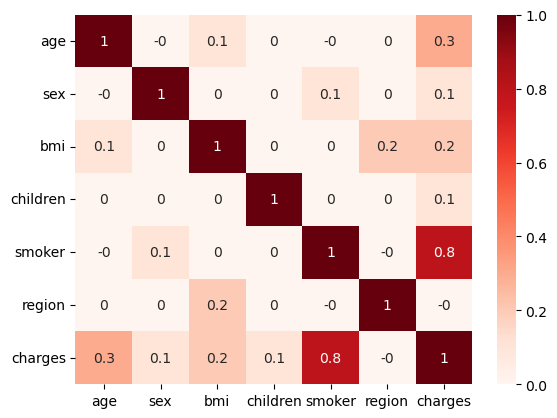

In [13]:
# Checking the correlation between features
plt.figure(dpi=100)
# if you need to have exact numbers in the plot just remove np.round() 
sns.heatmap(np.round(data.corr(),1),annot = True, cmap = "Reds")
#plt.savefig("figure_corr.png", dpi = 300)
plt.show()

In [14]:
data.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

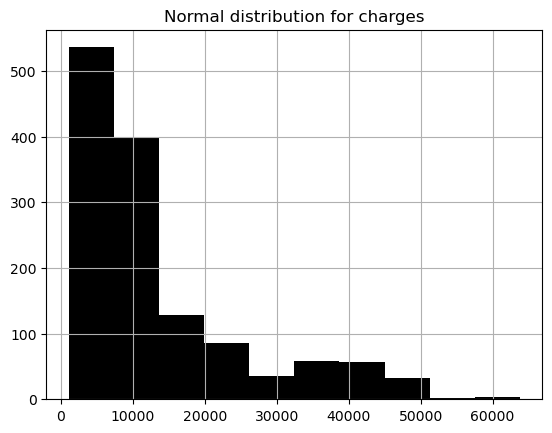

In [15]:
# Determining the normalisation 

data.charges.hist(color = "k")
plt.title("Normal distribution for charges")
plt.show()
# There is a problem which we have right skew. 

In [16]:
# Applying  D'Agostino's K-squared test
normaltest(data.charges.values)

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

In [17]:
# The right value or at least close to the right value is 0.05

<Axes: >

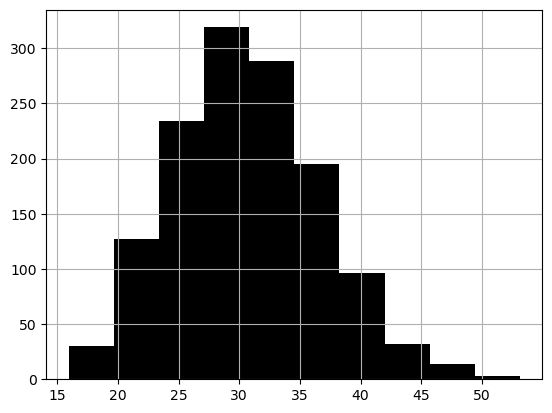

In [18]:
data.bmi.hist(color= "k")

In [19]:
# Three methods to solve the problem of normal distribution in charges 
# Transformation methods: 
# 1. Square root
# 2. Log 
# 3. Boxcox 


###  1. Square root

In [20]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)

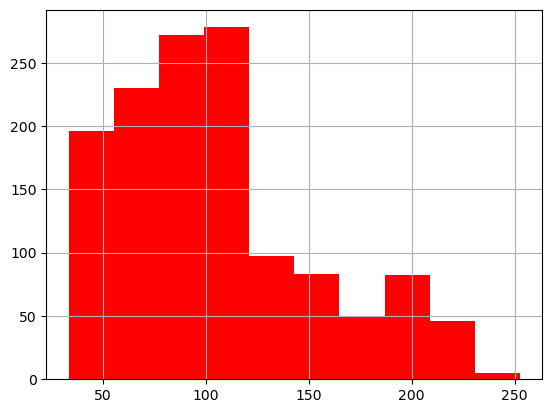

In [21]:
sqrt_charges = np.sqrt(data.charges)
plt.hist(sqrt_charges, color = "red")
plt.grid()
sqrt_test_res = normaltest(sqrt_charges.values)
sqrt_test_res

### 2.Log Transformation 

NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)

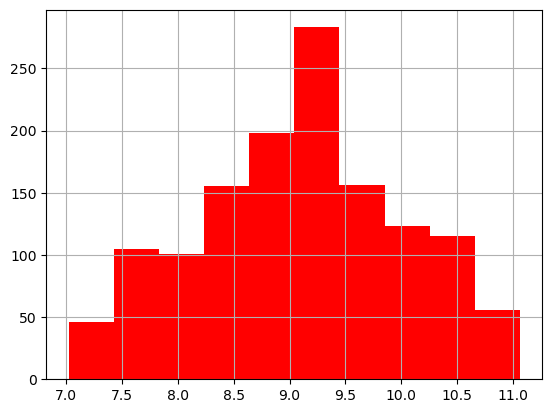

In [22]:
log_charges = np.log(data.charges)
plt.hist(log_charges,color = "red")
plt.grid()


log_test_res = normaltest(log_charges.values)
log_test_res

### 3 . Box Cox Transformation 

This is the formulas: 


$ boxcox(y_i) = \Large\frac{y_i^{λ}-1}{λ} $

0.5 for Lambda λ

In [23]:
bc_charges = boxcox(data.charges)

boxcox_medev = bc_charges[0]
lam = bc_charges[1]


NormaltestResult(statistic=54.4181017156977, pvalue=1.5249631686757666e-12)

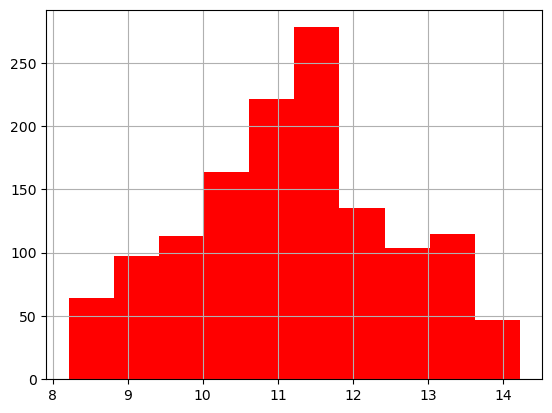

In [24]:
plt.hist(boxcox_medev,color = "red")
plt.grid()

bc_test_res = normaltest(boxcox_medev)
bc_test_res

In [25]:
d = {'Transfromation': ['Square_root','Log','Box Cox'], 
     'P_value': [sqrt_test_res[1],log_test_res[1],bc_test_res[1]]}

df_results = pd.DataFrame(d)

df_results

,Transfromation,P_value
0,Square_root,3.797574e-25
1,Log,3.570368e-12
2,Box Cox,1.524963e-12


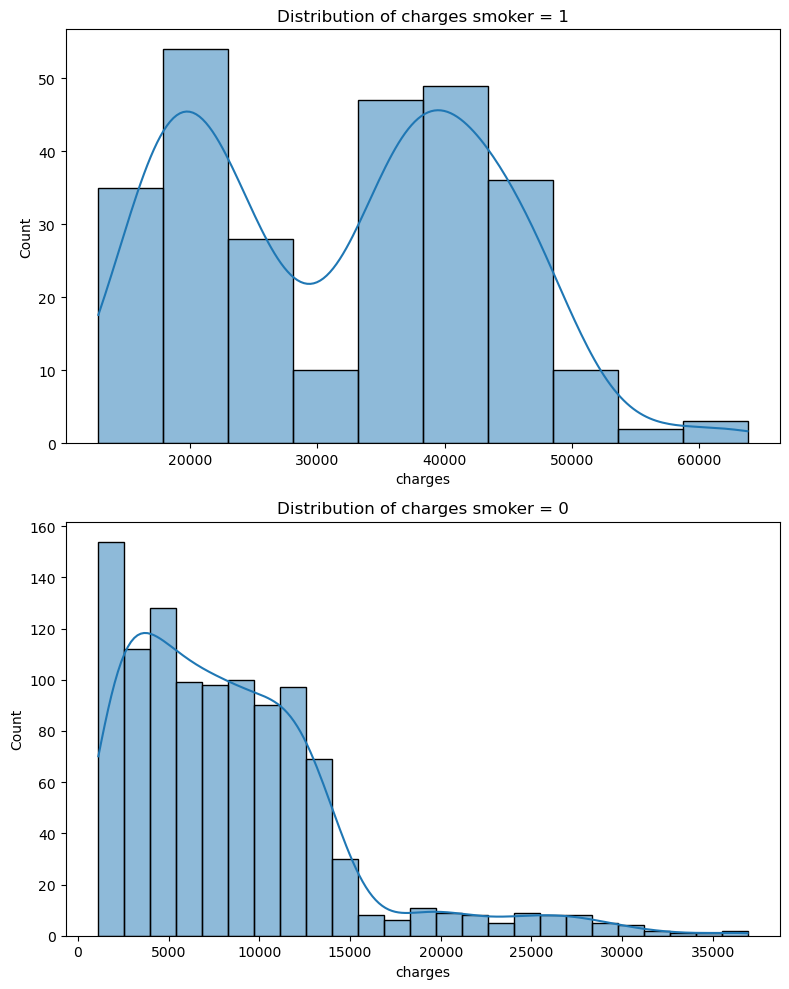

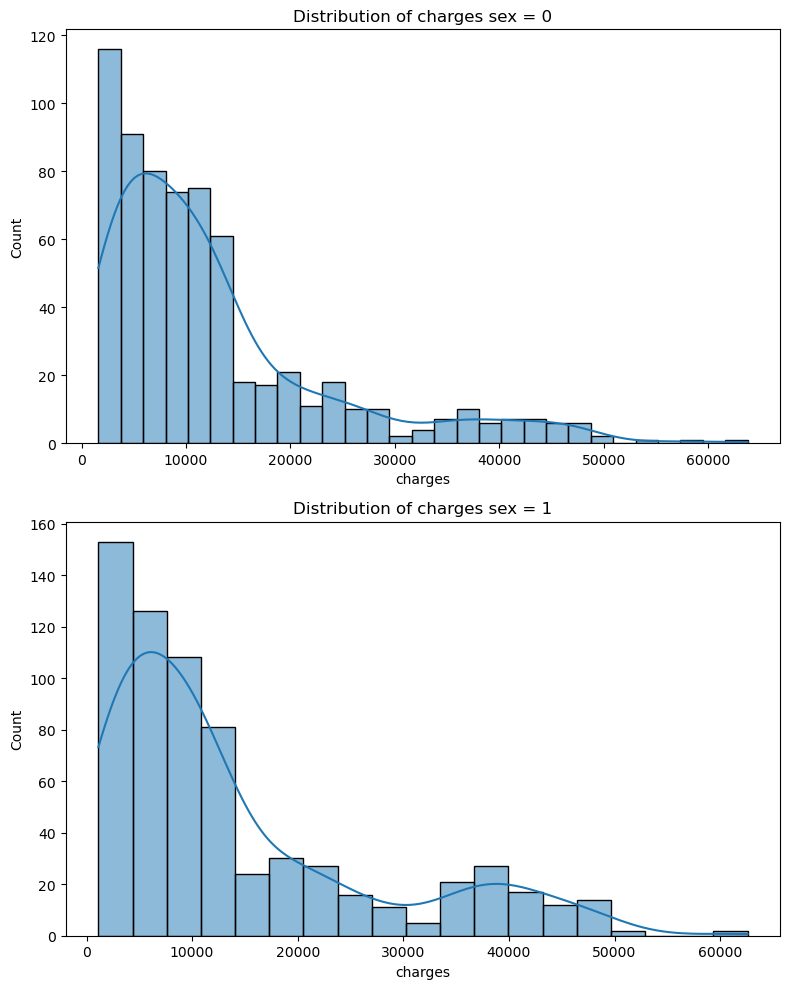

In [26]:
def plot_for_normality(data,group_by = None):
    if group_by: 
        groups = data[group_by].unique()
        fig, axes = plt.subplots(len(groups), 1,figsize =(8,5 * len(groups)))
        if len(groups) == 1:
            axes = [axes]
        for ax,group in zip(axes,groups):
            subset = data[data[group_by]== group]['charges']
            sns.histplot(subset,kde = True, ax = ax)
            ax.set_title(f'Distribution of charges {group_by} = {group}')
    else:
        sns.histplot(data['charges'],kde = True)
        plt.title("Distriubtion of Charges")
        
        
    plt.tight_layout()
    plt.show()
    
plot_for_normality(data,'smoker')
plot_for_normality(data,'sex')

# Applying Various Regression models 

In [32]:
insurance_data = data 

insurance_data['charges'] = np.log(insurance_data['charges'])
X = insurance_data.drop(['charges'],axis = 1)
y = insurance_data.charges


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [34]:
insurance_data.shape

(1338, 7)

In [35]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,9.268661
1334,18,0,31.920,0,0,0,7.698927
1335,18,0,36.850,0,0,2,7.396233
1336,21,0,25.800,0,0,3,7.604867


In [36]:
LR = LinearRegression() 

LR.fit(X_train,y_train)

y_predicted_linear = LR.predict(X_test)

In [38]:
y_test

764      9.115488
887      8.570198
890     10.286400
1293     9.137973
259     10.426744
          ...    
701      9.163426
672      8.389299
1163     7.696590
1103     9.338143
1295     7.583136
Name: charges, Length: 402, dtype: float64

In [39]:
mse_linear = mean_squared_error(y_test,y_predicted_linear)

In [40]:
mse_linear

0.18104413465689073

In [41]:
Acurracy_linear_model = r2_score(y_test,y_predicted_linear)

In [46]:
print(round(Acurracy_linear_model *100,2) ,"%")

78.38 %


In [50]:
RF = RandomForestRegressor(n_estimators = 200, random_state = 42, max_depth = 10)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [51]:
y_predicted_random_forest = RF.predict(X_test)

In [53]:
mse_random_forest = mean_squared_error(y_test,y_predicted_random_forest)
mse_random_forest

0.1524405424785837

In [54]:
Acurracy_RF_model = r2_score(y_test,y_predicted_random_forest)
Acurracy_RF_model

0.817959789909523

In [55]:
print(round(Acurracy_RF_model *100,2) ,"%")

81.8 %
